<h1>13 Data Analysis Examples</h1>

<p>Now that we've reached the final chapter of this book, we're going to take a look at a number of real-world datasets. For each dataset, we'll use the techniques presented in this book to extract meaning from the raw data. The demonstrated techniques can be applied to all manner of other datasets. This chapter contains a collection of miscellaneous example datasets that you can use for practice with the tools in this book.</p>

<p>The example datasets are found in the book's accompanying <a href="http://github.com/wesm/pydata-book">GitHub repository</a>. If you are unable to access GitHub, you can also get them from the <a href="https://gitee.com/wesmckinn/pydata-book">repository mirror on Gitee</a>.</p>

<h2>13.1 Bitly Data from 1.USA.gov</h2>

<p>In 2011, the URL shortening service <a href="https://bitly.com/">Bitly</a> partnered with the US government website <a href="https://www.usa.gov/">USA.gov</a> to provide a feed of anonymous data gathered from users who shorten links ending with .gov or .mil. In 2011, a live feed as well as hourly snapshots were available as downloadable text files. This service is shut down at the time of this writing (2022), but we preserved one of the data files for the book's examples.</p>

<p>In the case of the hourly snapshots, each line in each file contains a common form of web data known as JSON, which stands for JavaScript Object Notation. For example, if we read just the first line of a file, we may see something like this:</p>

In [1]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

In [1]:
path = "datasets/bitly_usagov/example.txt"
with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



<p>Python has both built-in and third-party libraries for converting a JSON string into a Python dictionary. Here we’ll use the <code>json</code> module and its <code>loads</code> function invoked on each line in the sample file we downloaded:</p>

In [2]:
import json
with open(path) as f:
    records = [json.loads(line) for line in f]

<p>The resulting object <code>records</code> is now a list of Python dictionaries:</p>

In [5]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

<h3>Counting Time Zones in Pure Python</h3>

<p>Suppose we were interested in finding the time zones that occur most often in the dataset (the <code>tz</code> field). There are many ways we could do this. First, let’s extract a list of time zones again using a list comprehension:</p>

In [6]:
time_zones = [rec["tz"] for rec in records]

KeyError: 'tz'

<p>Oops! Turns out that not all of the records have a time zone field. We can handle this by adding the check <code>if "tz" in rec</code> at the end of the list comprehension:</p>

In [7]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

<p>Just looking at the first 10 time zones, we see that some of them are unknown (empty string). You can filter these out also, but I’ll leave them in for now. Next, to produce counts by time zone, I’ll show two approaches: a harder way (using just the Python standard library) and a simpler way (using pandas). One way to do the counting is to use a dictionary to store counts while we iterate through the time zones:</p>

In [8]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

<p>Using more advanced tools in the Python standard library, you can write the same thing more briefly:</p>

In [9]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

<p>I put this logic in a function just to make it more reusable. To use it on the time zones, just pass the <code>time_zones</code> list:</p>

In [10]:
counts = get_counts(time_zones)

In [11]:
counts["America/New_York"]

1251

In [12]:
len(time_zones)

3440

<p>If we wanted the top 10 time zones and their counts, we can make a list of tuples by <code>(count, timezone)</code> and sort it:</p>

In [13]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

<p>We have then:</p>

In [14]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

<p>If you search the Python standard library, you may find the <code>collections.Counter</code> class, which makes this task even simpler:</p>

In [15]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

<h3>Counting Time Zones with pandas</h3>

<p>You can create a DataFrame from the original set of records by passing the list of records to <code>pandas.DataFrame</code>:</p>

In [16]:
frame = pd.DataFrame(records)

<p>We can look at some basic information about this new DataFrame, such as column names, inferred column types, or number of missing values, using <code>frame.info()</code>:</p>

In [17]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [18]:
frame["tz"].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

<p>The output shown for the <code>frame</code> is the summary view, shown for large DataFrame objects. We can then use the <code>value_counts</code> method for the Series:</p>

In [19]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

<p>We can visualize this data using matplotlib. We can make the plots a bit nicer by filling in a substitute value for unknown or missing time zone data in the records. We replace the missing values with the <code>fillna</code> method and use Boolean array indexing for the empty strings:</p>

In [20]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

<p>At this point, we can use the <a href="http://seaborn.pydata.org/">seaborn package</a> to make a horizontal bar plot (see <a href="#top_time">Top time zones in the 1.usa.gov sample data</a> for the resulting visualization):</p>
<span id="top_time"></span>

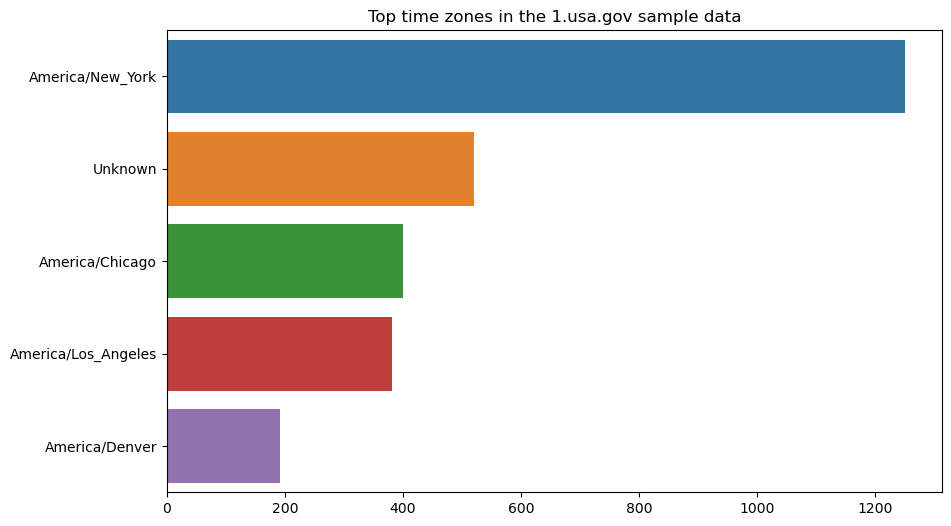

In [48]:
import seaborn as sns
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy()).set(
    title='Top time zones in the 1.usa.gov sample data');

<p>The <code>a</code> field contains information about the browser, device, or application used to perform the URL shortening:</p>

In [25]:
frame["a"][1]

'GoogleMaps/RochesterNY'

In [26]:
frame["a"][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [27]:
frame["a"][51][:50]  # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

<p>Parsing all of the interesting information in these “agent” strings may seem like a daunting task. One possible strategy is to split off the first token in the string (corresponding roughly to the browser capability) and make another summary of the user behavior:</p>

In [28]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [29]:
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

<p>Now, suppose you wanted to decompose the top time zones into Windows and non-Windows users. As a simplification, let’s say that a user is on Windows if the string <code>"Windows"</code> is in the agent string. Since some of the agents are missing, we’ll exclude these from the data:</p>

In [30]:
cframe = frame[frame["a"].notna()].copy()

<p>We want to then compute a value for whether or not each row is Windows:</p>

In [31]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"),
                        "Windows", "Not Windows")
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

<p>Then, you can group the data by its time zone column and this new list of operating systems:</p>

In [32]:
by_tz_os = cframe.groupby(["tz", "os"])

<p>The group counts, analogous to the <code>value_counts</code> function, can be computed with <code>size</code>. This result is then reshaped into a table with <code>unstack</code>:</p>

In [33]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


<p>Finally, let’s select the top overall time zones. To do so, I construct an indirect index array from the row counts in <code>agg_counts</code>. After computing the row counts with <code>agg_counts.sum("columns")</code>, I can call <code>argsort()</code> to obtain an index array that can be used to sort in ascending order:</p>

In [34]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55])

<p>I use <code>take</code> to select the rows in that order, then slice off the last 10 rows (largest values):</p>

In [51]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


<p>pandas has a conveience method caled <code>nlargest</code> that does the same thing:</p>

In [36]:
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

<p>Then, this can be plotted in a grouped bar plot comparing the number of Windows and non-Windows users, using seaborn's <code>barplot</code> function (see <a href="#top_time_win">Top time zones by Windows and non-Windows users</a>). I first call <code>count_subset.stack()</code> and reset the index to rearrange the data for better compatibility with seaborn:</p>
<span id='top_time_win'></span>

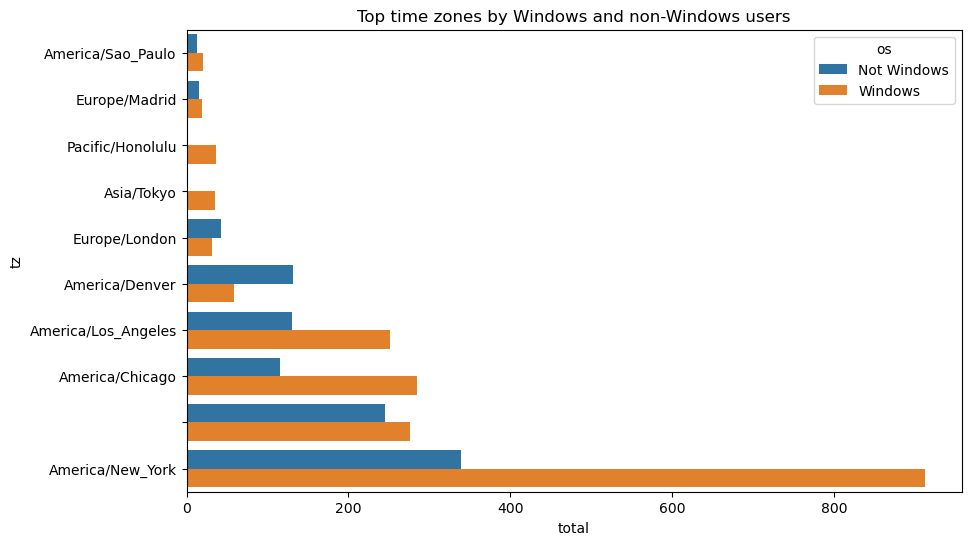

In [52]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)
sns.barplot(x="total", y="tz", hue="os", data=count_subset).set(
    title='Top time zones by Windows and non-Windows users');

<p>It is a bit difficult to see the relative percentage of Windows users in the smaller groups, so let's normalize the group percentages to sum to 1:</p>

In [45]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset.groupby("tz", group_keys=False).apply(norm_total)

<p>Then plot this in <a href="#percentage">Percentage Windows and non-Windows users in top occurring time zones</a>:</p>
<span id="percentage"></span>

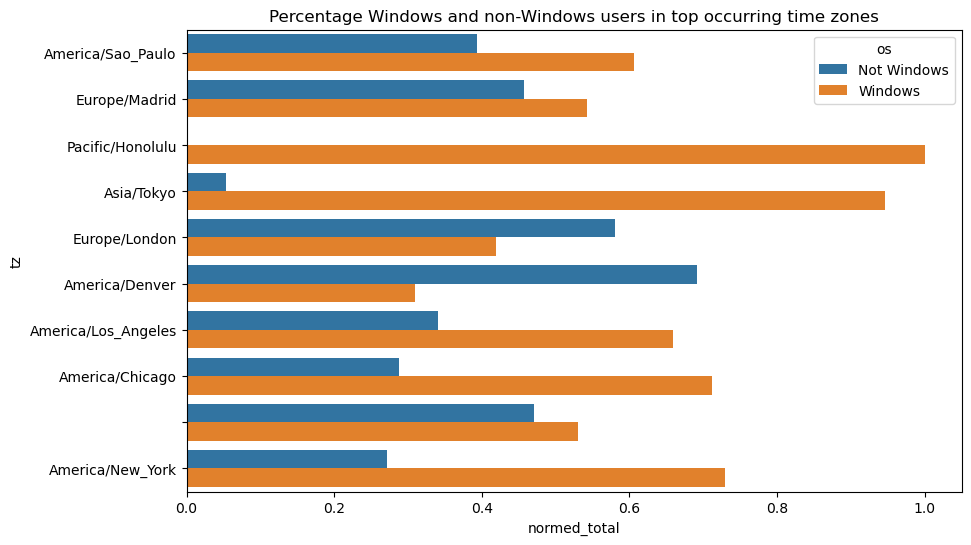

In [54]:
sns.barplot(x="normed_total", y="tz", hue="os", data=results).set(
    title='Percentage Windows and non-Windows users in top occurring time zones');

<p>We could have computed the normalized sum more efficiently by using the <code>transform</code> method with <code>groupby</code>:</p>

In [55]:
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")

<h2>13.2 MovieLens 1M Dataset</h2>

<p><a href='https://grouplens.org/datasets/movielens'>GroupLens Research</a> provides a number of collections of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provides movie ratings, movie metadata (genres and year), and demographic data about the users (age, zip code, gender identification, and occupation). Such data is often of interest in the development of recommendation systems based on machine learning algorithms. While we do not explore machine learning techniques in detail in this book, I will show you how to slice and dice datasets like these into the exact form you need.</p>

<p>The MovieLens 1M dataset contains one million ratings collected from six thousand users on four thousand movies. It’s spread across three tables: ratings, user information, and movie information. We can load each table into a pandas DataFrame object using <code>pandas.read_table</code>. Run the following code in a Jupyter cell:</p>

In [56]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("datasets/movielens/users.dat", sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("datasets/movielens/ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("datasets/movielens/movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

<p>You can verify that everything succeeded by loking at each DataFrame:</p>

In [57]:
users.head(5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [58]:
ratings.head(5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [59]:
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [60]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


<p>Note that ages and occupations are coded as integers indicating groups described in the dataset’s <em>README</em> file. Analyzing the data spread across three tables is not a simple task; for example, suppose you wanted to compute mean ratings for a particular movie by gender identity and age. As you will see, this is more convenient to do with all of the data merged together into a single table. Using pandas’s <code>merge</code> function, we first merge <code>ratings</code> with <code>users</code> and then merge that result with the <code>movies</code> data. pandas infers which columns to use as the merge (or <em>join</em>) keys based on overlapping names:</p>

In [61]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [62]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

<p>To get mean movie ratings for each film grouped by gender, we can use the <code>pivot_table</code> method:</p>

In [63]:
mean_ratings = data.pivot_table("rating", index="title",
                                columns="gender", aggfunc="mean")
mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


<p>This produced another DataFrame containing mean ratings with movie titles as row labels (the "index") and gender as column labels. I first filter down to movies that received at least 250 ratings (an arbitrary number); to do this, I group the data by title, and use <code>size()</code> to get a Series of group sizes for each title:</p>

In [64]:
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [65]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

<p>The index of titles receiving at least 250 ratings can then be used to select rows from <code>mean_ratings</code> using <code>.loc</code>:</p>

In [66]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


<p>To see the top films among female viewers, we can sort by the <code>F</code> column in descending order:</p>

In [67]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


<h3>Measuring Rating Disagreement</h3>

<p>Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to <code>mean_ratings</code> containing the difference in means, then sort by that:</p>

In [68]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

<p>Sorting by <code>"diff"</code> yields the movies with the greatest rating difference so that we can see which ones were preferred by women:</p>

In [69]:
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


<p>Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate as highly:</p>

In [70]:
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


<p>Suppose instead you wanted the movies that elicited the most disagreement among viewers, independent of gender identification. Disagreement can be measured by the variance or standard deviation of the ratings. To get this, we first compute the rating standard deviation by title and then filter down to the active titles:</p>

In [71]:
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

<p>Then, we sort in descending order and select the first 10 rows, which are roughly the 10 most divisively rated movies:</p>

In [72]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

<p>You may have noticed that movie genres are given as a pipe-separated (<code>|</code>) string, since a single movie can belong to multiple genres. To help us group the ratings data by genre, we can use the <code>explode</code> method on DataFrame. Let's take a look at how this works. First, we can split the genres string into a list of genres using the <code>str.split</code> method on the Series:</p>

In [73]:
movies["genres"].head()

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: genres, dtype: object

In [74]:
movies["genres"].head().str.split("|")

0     [Animation, Children's, Comedy]
1    [Adventure, Children's, Fantasy]
2                   [Comedy, Romance]
3                     [Comedy, Drama]
4                            [Comedy]
Name: genres, dtype: object

In [75]:
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


<p>Now, calling <code>movies.explode("genre")</code> generates a new DataFrame with one row for each "inner" element in each list of movie genres. For example, if a movie is classified as both a comedy and a romance, then there will be two rows in the result, one with just <code>"Comedy"</code> and the other with just <code>"Romance"</code>:</p>

In [76]:
movies_exploded = movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [77]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.iloc[0]

movie_id                     1
title         Toy Story (1995)
genre                Animation
user_id                      1
rating                       5
timestamp            978824268
gender                       F
age                          1
occupation                  10
zip                      48067
Name: 0, dtype: object

In [78]:
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])
                 ["rating"].mean()
                 .unstack("age"))

In [79]:
genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


<h2>13.3 US Baby Names 1880–2010</h2>

<p>The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through the present. Hadley Wickham, an author of several popular R packages, has this dataset in illustrating data manipulation in R.</p>

<p>We need to do some data wrangling to load this dataset.</p>
<!--, but once we do that we will have a DataFrame that looks like this:</p>
-->
<p>There are many things you might want to do with the dataset:</p>
<ul>
    <li>Visualize the proportion of babies given a particular name (your own, or another name) over time</li>
    <li>Determine the relative rank of a name</li>
    <li>Determine the most popular names in each year or the names whose popularity has advanced or declined the most</li>
    <li>Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters</li>
    <li>Analyze external sources of trends: biblical names, celebrities, demographics</li>
</ul>

<p>With the tools in this book, many of these kinds of analyses are within reach, so I will walk you through some of them.</p>

<p>As of this writing, the US Social Security Administration makes available data files, one per year, containing the total number of births for each sex/name combination. You can download the <a href='http://www.ssa.gov/oact/babynames/limits.html'>raw archive</a> of these files.</p>

<p>If this page has been moved by the time you’re reading this, it can most likely be located again with an internet search. After downloading the “National data” file <em>names.zip</em> and unzipping it, you will have a directory containing a series of files like <em>yob1880.txt</em>. I use the Unix <code>head</code> command to look at the first 10 lines of one of the files (on Windows, you can use the <code>more</code> command or open it in a text editor):</p>

In [80]:
!head -n 10 datasets/babynames/yob1880.txt

<p>As this is already in comma-separated form, it can be loaded into a DataFrame with <code>pandas.read_csv</code>:</p>

In [81]:
names1880 = pd.read_csv("datasets/babynames/yob1880.txt",
                        names=["name", "sex", "births"])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


<p>These files only contain names with at least five occurrences in each year, so for simplicity’s sake we can use the sum of the births column by sex as the total number of births in that year:</p>

In [82]:
names1880.groupby("sex")["births"].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

<p>Since the dataset is split into files by year, one of the first things to do is to assemble all of the data into a single DataFrame and further add a <code>year</code> field. You can do this using <code>pandas.concat</code>. Run the following in a Jupyter cell:</p>

In [83]:
pieces = []
for year in range(1880, 2011):
    path = f"datasets/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    # Add a column for the year
    frame["year"] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

<p>There are a couple things to note here. First, remember that <code>concat</code> combines the DataFrame objects by row by default. Second, you have to pass <code>ignore_index=True</code> because we’re not interested in preserving the original row numbers returned from <code>pandas.read_csv</code>. So we now have a single DataFrame containing all of the names data across all years:</p>

In [84]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


<p>With this data in hand, we can already start aggregating the data at the year and sex level using <code>groupby</code> or <code>pivot_table</code> (see <a href="#total">Total births by sex and year</a>):</p>

In [86]:
total_births = names.pivot_table("births", index="year",
                                 columns="sex", aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<span id='total'></span>

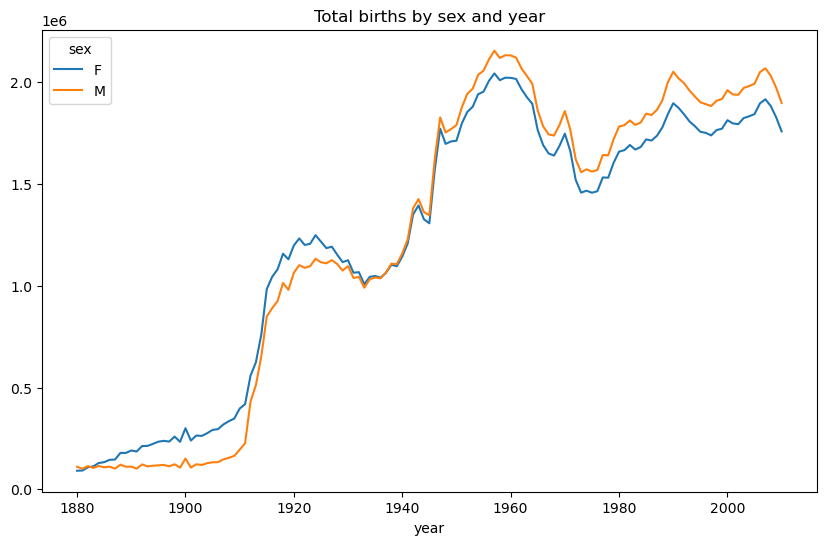

In [87]:
total_births.plot(title="Total births by sex and year");

<p>Next, let’s insert a column <code>prop</code> with the fraction of babies given each name relative to the total number of births. A <code>prop</code> value of <code>0.02</code> would indicate that 2 out of every 100 babies were given a particular name. Thus, we group the data by year and sex, then add the new column to each group:</p>

In [89]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group
names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)

<p>The resulting complete dataset now has the following columns:</p>

In [90]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


<p>When performing a group operation like this, it's often valuable to do a sanity check, like verifying that the <code>prop</code> column sums to 1 within all the groups:</p>

In [91]:
names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

<p>Now that this is done, I’m going to extract a subset of the data to facilitate further analysis: the top 1,000 names for each sex/year combination. This is yet another group operation:</p>

In [92]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]

grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

<p>We can drop the group index since we don't need it for our analysis:</p>

In [93]:
top1000 = top1000.reset_index(drop=True)

<p>The resulting dataset is now quite a bit smaller:</p>

In [94]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


<p>We’ll use this top one thousand dataset in the following investigations into the data.</p>

<h3>Analyzing Naming Trends</h3>

<p>With the full dataset and the top one thousand dataset in hand, we can start analyzing various naming trends of interest. First, we can split the top one thousand names into the boy and girl portions:</p>

In [95]:
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

<p>Simple time series, like the number of Johns or Marys for each year, can be plotted but require some manipulation to be more useful. Let’s form a pivot table of the total number of births by year and name:</p>

In [96]:
total_births = top1000.pivot_table("births", index="year",
                                   columns="name",
                                   aggfunc=sum)

<p>Now, this can be plotted for a handful of names with DataFrame’s <code>plot</code> method (<a href="#a_few">A few boy and girl names over time shows the result</a>):</p>

In [97]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


<span id='a_few'></span>

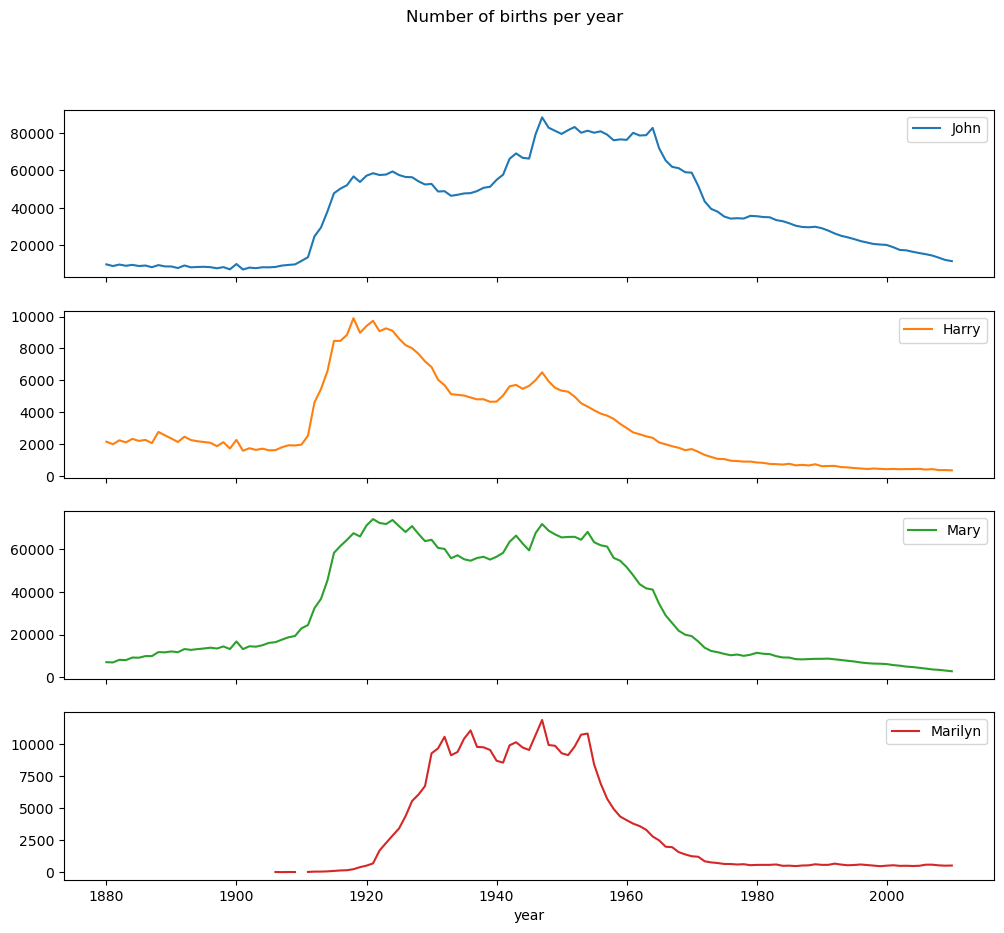

In [98]:
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset.plot(subplots=True, figsize=(12, 10),
            title="Number of births per year");

<p>On looking at this, you might conclude that these names have grown out of favor with the American population. But the story is actually more complicated than that, as will be explored in the next section.<p>
    
<h4>Measuring the increase in naming diversity</h4>

<p>One explanation for the decrease in plots is that fewer parents are choosing common names for their children. This hypothesis can be explored and confirmed in the data. One measure is the proportion of births represented by the top 1,000 most popular names, which I aggregate and plot by year and sex (<a href="#proportion">Proportion of births represented in top one thousand names by sex</a> shows the resulting plot):</p>

<span id="proportion"></span>

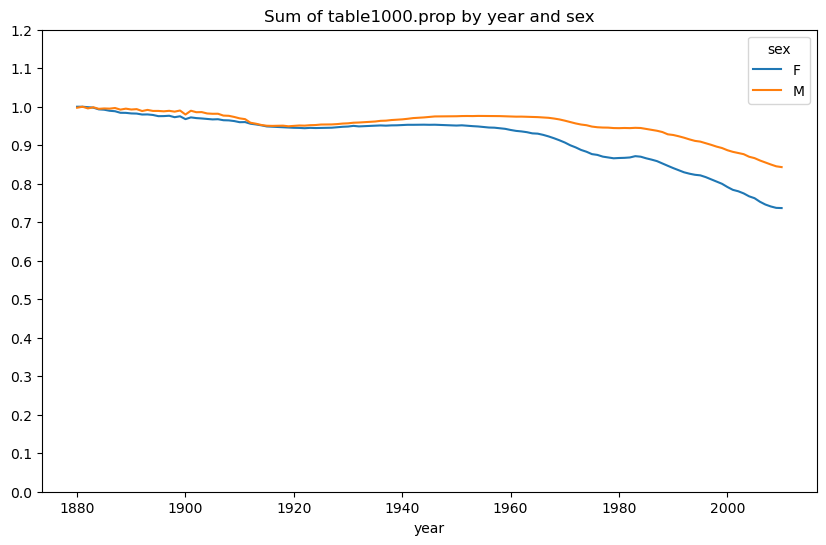

In [100]:
table = top1000.pivot_table("prop", index="year",
                            columns="sex", aggfunc=sum)
table.plot(title="Sum of table1000.prop by year and sex",
           yticks=np.linspace(0, 1.2, 13));

<p>You can see that, indeed, there appears to be increasing name diversity (decreasing total proportion in the top one thousand). Another interesting metric is the number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births. This number is trickier to compute. Let’s consider just the boy names from 2010:</p>

In [101]:
df = boys[boys["year"] == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


<p>After sorting <code>prop</code> in descending order, we want to know how many of the most popular names it takes to reach 50%. You could write a <code>for</code> loop to do this, but a vectorized NumPy way is more computationally efficient. Taking the cumulative sum, <code>cumsum</code>, of <code>prop</code> and then calling the method <code>searchsorted</code> returns the position in the cumulative sum at which <code>0.5</code> would need to be inserted to keep it in sorted order:</p>

In [102]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [103]:
prop_cumsum.searchsorted(0.5)

116

<p>Since arrays are zero-indexed, adding 1 to this result gives you a result of 117. By contrast, in 1900 this number was much smaller:</p>

In [104]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

25

<p>You can now apply this operation to each year/sex combination, <code>groupby</code> those fields, and <code>apply</code> a function returning the count for each group:</p>

In [105]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()

<p>This resulting DataFrame <code>diversity</code> now has two time series, one for each sex, indexed by year. This can be inspected and plotted as before (see <a href="#plot_diversity">Plot of diversity metric by year</a>):</p>

In [106]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<span id='plot_diversity'></span>

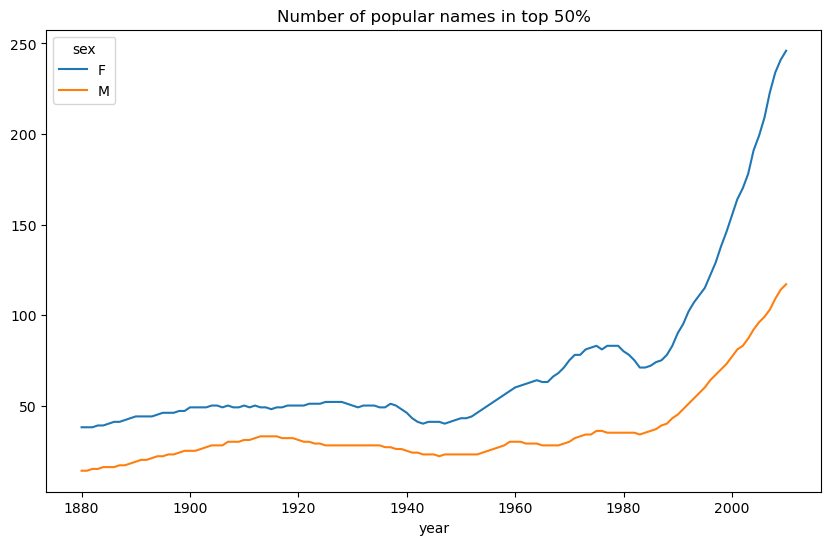

In [107]:
diversity.plot(title="Number of popular names in top 50%");

<p>As you can see, girl names have always been more diverse than boy names, and they have only become more so over time. Further analysis of what exactly is driving the diversity, like the increase of alternative spellings, is left to the reader.</p>

<h4>The “last letter” revolution</h4>

<p>In 2007, baby name researcher Laura Wattenberg pointed out that the distribution of boy names by final letter has changed significantly over the last 100 years. To see this, we first aggregate all of the births in the full dataset by year, sex, and final letter:</p>

In [108]:
def get_last_letter(x):
    return x[-1]

last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"

table = names.pivot_table("births", index=last_letters,
                          columns=["sex", "year"], aggfunc=sum)

<p>Then we select three representative years spanning the history and print the first few rows:</p>

In [110]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

<p>Next, normalize the table by total births to compute a new table containing the proportion of total births for each sex ending in each letter:</p>

In [111]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [112]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

<p>With the letter proportions now in hand, we can make bar plots for each sex, broken down by year (see <a href='proportion'>Proportion of boy and girl names ending in each letter</a>):</p>

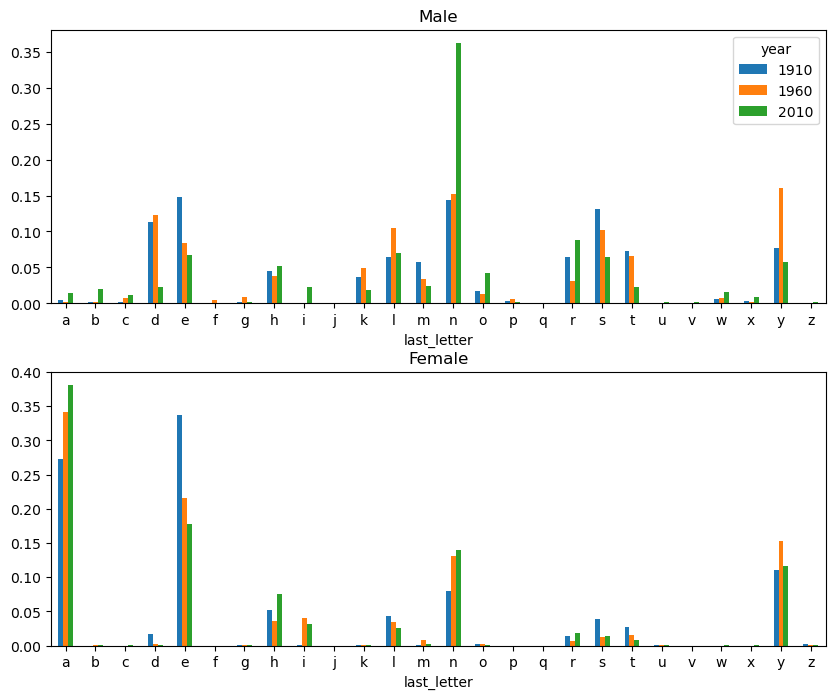

In [114]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female",
                      legend=False)
plt.subplots_adjust(hspace=0.25)

<p>As you can see, boy names ending in <em>n</em> have experienced significant growth since the 1960s. Going back to the full table created before, I again normalize by year and sex and select a subset of letters for the boy names, finally transposing to make each column a time series:</p>

In [115]:
letter_prop = table / table.sum()

dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


<p>With this DataFrame of time series in hand, I can make a plot of the trends over time again with its <code>plot</code> method (see <a href="#proportion_boys">Proportion of boys born with names ending in d/n/y over time</a>):</p>
<span id='proportion_boys'></span>

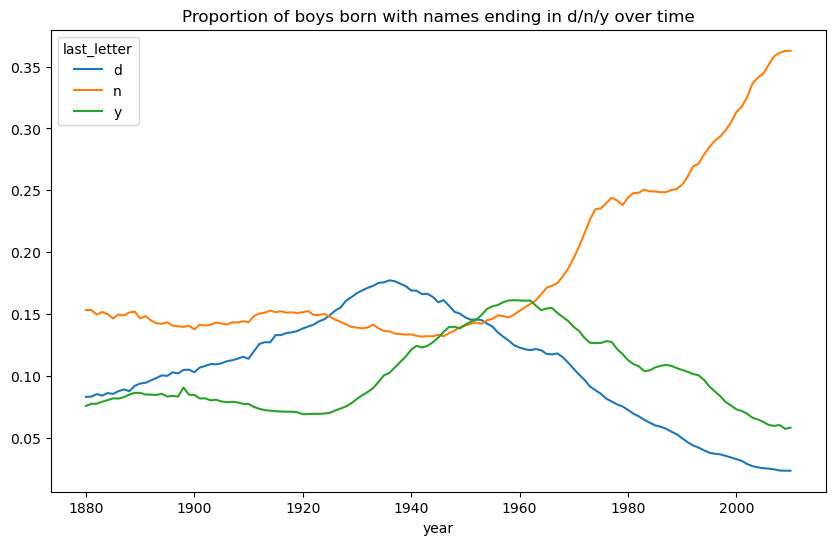

In [117]:
dny_ts.plot(
    title='Proportion of boys born with names ending in d/n/y over time');

<h4>Boy names that became girl names (and vice versa)</h4>

<p>Another fun trend is looking at names that were more popular with one gender earlier in the sample but have become preferred as a name for the other gender over time. One example is the name Lesley or Leslie. Going back to the <code>top1000</code> DataFrame, I compute a list of names occurring in the dataset starting with "Lesl":</p>

In [118]:
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

<p>From there, we can filter down to just those names and sum births grouped by name to see the relative frequencies:</p>

In [119]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

<p>Next, let's aggregate by sex and year, and normalize within year:</p>

In [120]:
table = filtered.pivot_table("births", index="year",
                             columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


<p>Lastly, it’s now possible to make a plot of the breakdown by sex over time (see <a href='#proportion_lesley'>Proportion of male/female Lesley-like names over time</a>):</p>
<span id='proportion_lesley'></span>

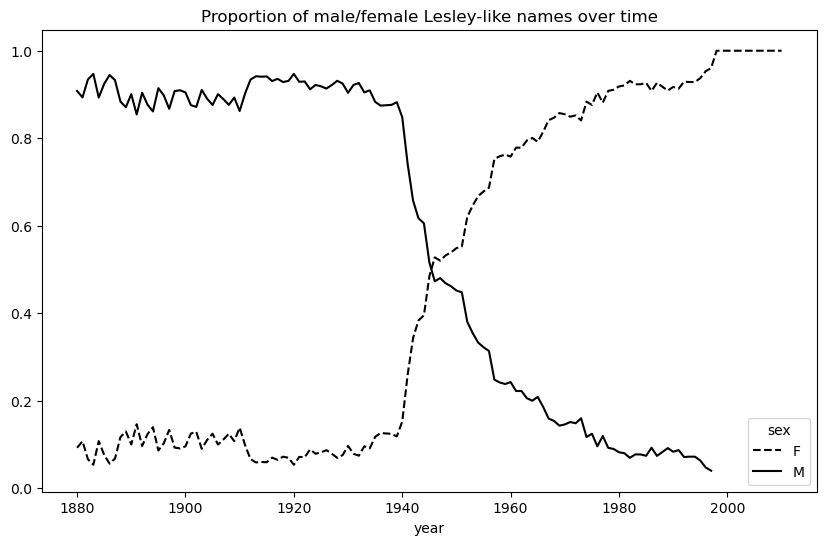

In [121]:
table.plot(style={"M": "k-", "F": "k--"},
          title='Proportion of male/female Lesley-like names over time');

<h2>13.4 USDA Food Database</h2>

<p>The US Department of Agriculture (USDA) makes available a database of food nutrient information. Programmer Ashley Williams created a version of this database in JSON format.</p>

<p>Each food has a number of identifying attributes along with two lists of nutrients and portion sizes. Data in this form is not particularly amenable to analysis, so we need to do some work to wrangle the data into a better form.</p>

<p>You can load this file into Python with any JSON library of your choosing. I’ll use the built-in Python json module:
</p>

In [3]:
import json
db = json.load(open("datasets/usda_food/database.json"))
len(db)

6636

<p>Each entry in <code>db</code> is a dictionary containing all the data for a single food. The <code>"nutrients"</code> field is a list of dictionaries, one for each nutrient:</p>

In [123]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [124]:
db[0]["nutrients"][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [125]:
nutrients = pd.DataFrame(db[0]["nutrients"])
nutrients.head(7)

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


<p>When converting a list of dictionaries to a DataFrame, we can specify a list of fields to extract. We’ll take the food names, group, ID, and manufacturer:</p>

In [4]:
info_keys = ["description", "group", "id", "manufacturer"]
info = pd.DataFrame(db, columns=info_keys)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [5]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


<p>From the output of <code>info.info()</code>, we can see that there is missing data in the <code>manufacturer</code> column.</p>

<p>You can see the distribution of food groups with <code>value_counts</code>:</p>

In [6]:
pd.value_counts(info["group"])[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

<p>Now, to do some analysis on all of the nutrient data, it’s easiest to assemble the nutrients for each food into a single large table. To do so, we need to take several steps. First, I’ll convert each list of food nutrients to a DataFrame, add a column for the food <code>id</code>, and append the DataFrame to a list. Then, these can be concatenated with <code>concat</code>. Run the following code in a Jupyter cell:</p>

In [7]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

<p>If all goes well, <code>nutrients</code> should look like this:</p>

In [8]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


<p>I noticed that there are duplicates in this DataFrame, so it makes things easier to drop them:</p>

In [16]:
nutrients.duplicated().sum()  # number of duplicates

14179

In [17]:
nutrients = nutrients.drop_duplicates()

<p>Since <code>"group"</code> and <code>"description"</code> are in both DataFrame objects, we can rename for clarity:</p>

In [18]:
col_mapping = {"description" : "food",
               "group"       : "fgroup"}
info = info.rename(columns=col_mapping, copy=False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [19]:
col_mapping = {"description" : "nutrient",
               "group" : "nutgroup"}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


<p>With all of this done, we're ready to merge <code>info</code> with <code>nutrients</code>:</p>

In [20]:
ndata = pd.merge(nutrients, info, on="id")
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [21]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

<p>We could now make a plot of median values by food group and nutrient type (see <a href="#median_zinc">Median zinc values by food group</a>):</p>
<span id='median_zinc'></span>

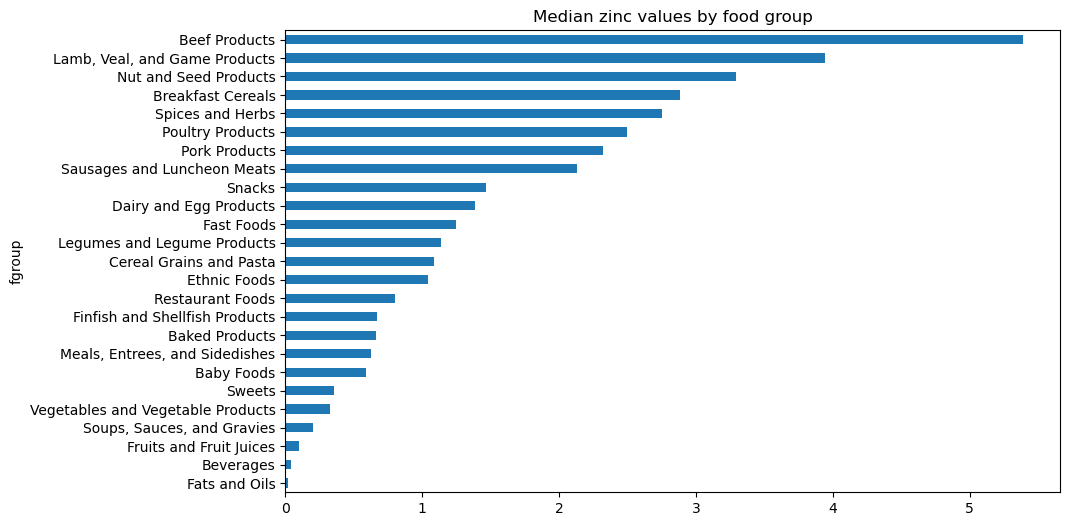

In [22]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)
result["Zinc, Zn"].sort_values().plot(kind="barh",
                                     title='Median zinc values by food group');

<p>Using the <code>idxmax</code> or <code>argmax</code> Series methods, you can find which food is most dense in each nutrient. Run the following in a Jupyter cell:</p>

In [23]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])

def get_maximum(x):
    return x.loc[x.value.idxmax()]

max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

# make the food a little smaller
max_foods["food"] = max_foods["food"].str[:50]

<p>The resulting DataFrame is a bit too large to display in the book; here is only the <code>"Amino Acids"</code> nutrient group:</p>

In [24]:
max_foods.loc["Amino Acids"]["food"]

nutrient
Alanine                            Gelatins, dry powder, unsweetened
Arginine                                Seeds, sesame flour, low-fat
Aspartic acid                                    Soy protein isolate
Cystine                 Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                    Soy protein isolate
Glycine                            Gelatins, dry powder, unsweetened
Histidine                 Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINAL RE
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTERNAT
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTERNAT
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Native
Methionine                     Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTERNAT
Proline                            Gelatins, dry powder, unsweetened
Serine            Soy pro

<h2>13.5 2012 Federal Election Commission Database</h2>

<p>The US Federal Election Commission (FEC) publishes data on contributions to political campaigns. This includes contributor names, occupation and employer, address, and contribution amount. The contribution data from the 2012 US presidential election was available as a single 150-megabyte CSV file <em>P00000001-ALL.csv</em> (see the book's data repository), which can be loaded with <code>pandas.read_csv</code>:</p>

In [25]:
fec = pd.read_csv("datasets/fec/P00000001-ALL.csv", low_memory=False)
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

<p><strong>Note</strong><br />
Several people asked me to update the dataset from the 2012 election to the 2016 or 2020 elections. Unfortunately, the more recent datasets provided by the FEC have become larger and more complex, and I decided that working with them here would be a distraction from the analysis techniques that I wanted to illustrate.</p>

<p>A sample record in the DataFrame looks like this:</p>

In [26]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

<p>You may think of some ways to start slicing and dicing this data to extract informative statistics about donors and patterns in the campaign contributions. I’ll show you a number of different analyses that apply the techniques in this book.</p>

<p>You can see that there are no political party affiliations in the data, so this would be useful to add. You can get a list of all the unique political candidates using <code>unique</code>:</p>

In [27]:
unique_cands = fec["cand_nm"].unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [28]:
unique_cands[2]

'Obama, Barack'

<p>One way to indicate party affiliation is using a dictionary:</p>

In [29]:
parties = {"Bachmann, Michelle": "Republican",
           "Cain, Herman": "Republican",
           "Gingrich, Newt": "Republican",
           "Huntsman, Jon": "Republican",
           "Johnson, Gary Earl": "Republican",
           "McCotter, Thaddeus G": "Republican",
           "Obama, Barack": "Democrat",
           "Paul, Ron": "Republican",
           "Pawlenty, Timothy": "Republican",
           "Perry, Rick": "Republican",
           "Roemer, Charles E. 'Buddy' III": "Republican",
           "Romney, Mitt": "Republican",
           "Santorum, Rick": "Republican"}

<p>Now, using this mapping and the <code>map</code> method on Series objects, you can compute an array of political parties from the candidate names:</p>

In [30]:
fec["cand_nm"][123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [31]:
fec["cand_nm"][123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [32]:
# Add it as a column
fec["party"] = fec["cand_nm"].map(parties)
fec["party"].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

<p>A couple of data preparation points. First, this data includes both contributions and refunds (negative contribution amount):</p>

In [33]:
(fec["contb_receipt_amt"] > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

<p>To simplify the analysis, I’ll restrict the dataset to positive contributions:</p>

In [34]:
fec = fec[fec["contb_receipt_amt"] > 0]

<p>Since Barack Obama and Mitt Romney were the main two candidates, I’ll also prepare a subset that just has contributions to their campaigns:</p>

In [35]:
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]

<h3>Donation Statistics by Occupation and Employer</h3>

<p>Donations by occupation is another oft-studied statistic. For example, attorneys tend to donate more money to Democrats, while business executives tend to donate more to Republicans. You have no reason to believe me; you can see for yourself in the data. First, the total number of donations by occupation can be computed with <code>value_counts</code>:</p>

In [36]:
fec["contbr_occupation"].value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

<p>You will notice by looking at the occupations that many refer to the same basic job type, or there are several variants of the same thing. The following code snippet illustrates a technique for cleaning up a few of them by mapping from one occupation to another; note the “trick” of using <code>dict.get</code> to allow occupations with no mapping to “pass through”:</p>

In [37]:
occ_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
   "C.E.O.": "CEO"
}

def get_occ(x):
    # If no mapping provided, return x
    return occ_mapping.get(x, x)

fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)

<p>I’ll also do the same thing for employers:</p>

In [39]:
emp_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "SELF" : "SELF-EMPLOYED",
   "SELF EMPLOYED" : "SELF-EMPLOYED",
}

def get_emp(x):
    # If no mapping provided, return x
    return emp_mapping.get(x, x)

fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)

<p>Now, you can use <code>pivot_table</code> to aggregate the data by party and occupation, then filter down to the subset that donated at least $2 million overall:</p>

In [40]:
by_occupation = fec.pivot_table("contb_receipt_amt",
                                index="contbr_occupation",
                                columns="party", aggfunc="sum")
over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


<p>It can be easier to look at this data graphically as a bar plot (<code>"barh"</code> means horizontal bar plot; see <a href='#total_donations'>Total donations by party for top occupations</a>):</p>
<span id='total_donations'></span>

<Axes: title={'center': 'Total donations by party for top occupations'}, ylabel='contbr_occupation'>

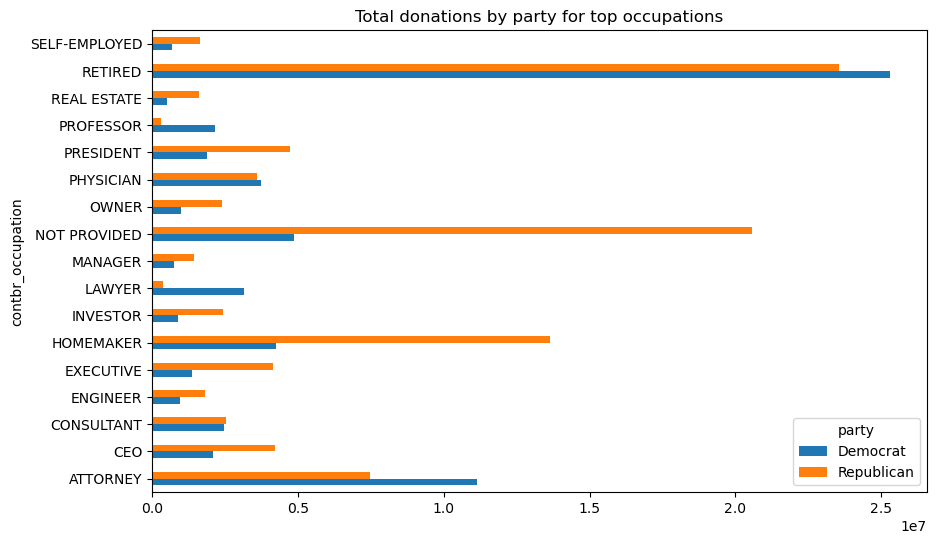

In [41]:
over_2mm.plot(kind="barh",
              title='Total donations by party for top occupations')

<p>You might be interested in the top donor occupations or top companies that donated to Obama and Romney. To do this, you can group by candidate name and use a variant of the <code>top</code> method from earlier in the chapter:</p>

In [42]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)["contb_receipt_amt"].sum()
    return totals.nlargest(n)

<p>Then aggregate by occupation and employer:</p>

In [43]:
grouped = fec_mrbo.groupby("cand_nm")
grouped.apply(get_top_amounts, "contbr_occupation", n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [44]:
grouped.apply(get_top_amounts, "contbr_employer", n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

<h3>Bucketing Donation Amounts</h3>

<p>A useful way to analyze this data is to use the <code>cut</code> function to discretize the contributor amounts into buckets by contribution size:</p>

In [45]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100_000, 1_000_000, 10_000_000])
labels = pd.cut(fec_mrbo["contb_receipt_amt"], bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

<p>We can then group the data for Obama and Romney by name and bin label to get a histogram by donation size:</p>

In [46]:
grouped = fec_mrbo.groupby(["cand_nm", labels])
grouped.size().unstack(level=0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


<p>This data shows that Obama received a significantly larger number of small donations than Romney. You can also sum the contribution amounts and normalize within buckets to visualize the percentage of total donations of each size by candidate (<a href="#percentage_total">Percentage of total donations received by candidates for each donation size</a> shows the resulting plot):</p>

In [47]:
bucket_sums = grouped["contb_receipt_amt"].sum().unstack(level=0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis="columns"),
                              axis="index")
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


<span id='percentage_total'></span>

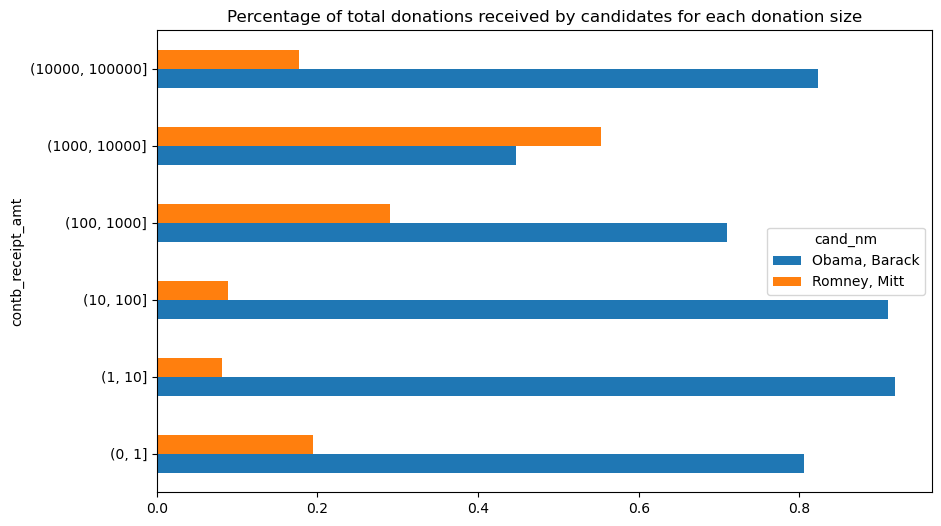

In [49]:
normed_sums[:-2].plot(kind="barh",
                     title='Percentage of total donations received by candidates for each donation size');

<p>I excluded the two largest bins, as these are not donations by individuals.</p>

<p>This analysis can be refined and improved in many ways. For example, you could aggregate donations by donor name and zip code to adjust for donors who gave many small amounts versus one or more large donations. I encourage you to explore the dataset yourself.</p>

<he>Donation Statistics by State</h3>

<p>We can start by aggregating the data by candidate and state:</p>

In [50]:
grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"])
totals = grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)
totals = totals[totals.sum(axis="columns") > 100000]
totals.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


<p>If you divide each row by the total contribution amount, you get the relative percentage of total donations by state for each candidate:</p>

In [51]:
percent = totals.div(totals.sum(axis="columns"), axis="index")
percent.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
